<a href="https://colab.research.google.com/github/hiroto-noguchi/book_2023/blob/main/chapter_2/2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 必要なライブラリーをインストールする。
!pip install praat-parselmouth

# parselmouth をインポートする。
import parselmouth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


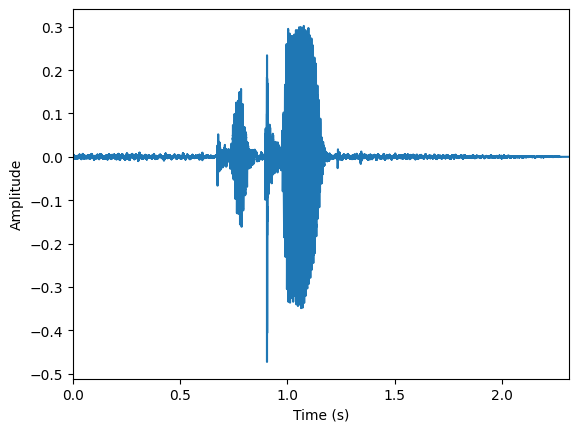

In [2]:
# IPython.display からAudio をインポートする。
from IPython.display import Audio
# 音声ファイルを読み込む。
audio_file = '/content/untitled.wav'
# 音声ファイルを再生する。
Audio(filename=audio_file)

# matplotlib.pyplot をplt としてインポートする。
import matplotlib.pyplot as plt
'''parselmouth.Sound を用いて音声ファイルを読み込
む。'''
sound = parselmouth.Sound(
'/content/untitled.wav')
# 音声データの波形をプロットする。
plt.plot(sound.xs(), sound.values.T)
# x 軸の範囲を設定する。
plt.xlim([sound.xmin, sound.xmax])
# x 軸のラベルを設定する。
plt.xlabel('Time (s)')
# y 軸のラベルを設定する。
plt.ylabel('Amplitude')
# グラフを表示する。
plt.show()

In [3]:
# numpy をインポートし、np という名前で使用する。
import numpy as np
'''matplotlib.pyplot をインポートし、plt という名前
で使用する。'''
import matplotlib.pyplot as plt
# scipy.io からwavfile をインポートする。
from scipy.io import wavfile
# スペクトログラムを描画する関数を定義する。
def draw_spectrogram\
(spectrogram, dynamic_range=70):
  # スペクトログラムのX 軸とY 軸を取得する。
  X, Y = spectrogram.x_grid(), \
  spectrogram.y_grid()
  # スペクトログラムの値をデシベルに変換する。
  sg_db = 10 * np.log10(spectrogram.values)
  # スペクトログラムを描画する。
  plt.pcolormesh(X, Y, sg_db,
  vmin=sg_db.max() - dynamic_range)
  # Y 軸の範囲を設定する。
  plt.ylim(
  [spectrogram.ymin, spectrogram.ymax])
  # X 軸とY 軸のラベルを設定する。
  plt.xlabel('time [s]')
  plt.ylabel('frequency [Hz]')

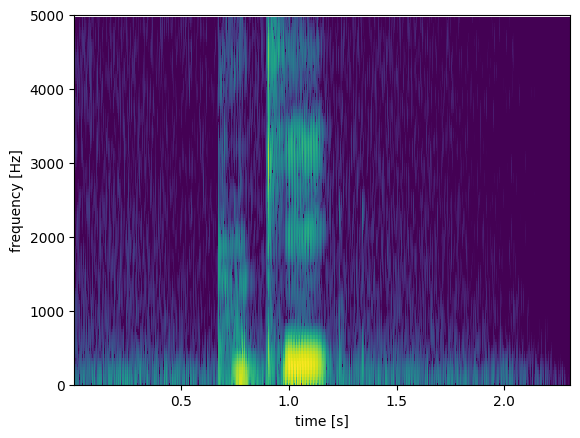

In [4]:
''' 音声ファイルを読み込み、スペクトログラムを計算す
る。'''
spectrogram = sound.to_spectrogram()
# スペクトログラムを描画する。
draw_spectrogram(spectrogram)
# 描画結果を表示する。
plt.show()

In [5]:
# 音をピッチに変換する。
pitch = sound.to_pitch()
# ピッチの周波数を選択し、配列に格納する。
pitch_values = \
pitch.selected_array['frequency']
# 周波数の配列をリストに変換する。
pitch_list = pitch_values.tolist()
# 結果のピッチリストを表示する。
pitch_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 133.74010449162455,
 131.86158558204085,
 133.17605929753523,
 134.06680843206732,
 133.7752272723862,
 129.35660898764556,
 121.05782943559505,
 119.51899785959361,
 123.8959396405691,
 124.61791735985831,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 158.65284208764257,
 155.64079003269273,
 142.9790512514552,
 139.31023572542716,
 137.27472122530656,
 136.20051817009517,
 135.69355396636814,
 136.05494638700011,
 136.28934411050724,
 137.05004474601364,
 138.20779839953533,
 139.34506475746502,
 140.13933627026668,
 141.04363

In [6]:
# ピッチの平均値を取得する。
mean_pitch = parselmouth.praat.call(
pitch, 'Get mean', 0.0, 0.0, 'Hertz')
mean_pitch

137.07026260054064

In [7]:
# tgt ライブラリーをインストールする。
!pip install tgt
# tgt ライブラリーをインポートする。
import tgt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# TextGrid ファイルを読み込む。
textgrid = tgt.read_textgrid(
'/content/untitled.TextGrid')
# 'silences' という名前の層を取得する。
intervals = \
textgrid.get_tier_by_name('silences')
''' 各インターバルの情報を取得し、平均ピッチ値を計算し
て表示する。'''
for interval in intervals:
  # 開始時刻を取得する。
  start_time = interval.start_time
  # 終了時刻を取得する。
  end_time = interval.end_time
  # テキストを取得する。
  text = interval.text
  # 平均ピッチ値を計算する。
  pitch_value = parselmouth.praat.call(
  pitch, 'Get mean',
  start_time, end_time, 'Hertz')
  # テキストと平均ピッチ値を表示する。
  print(text, pitch_value)

silent nan
sounding 137.07026260054064
silent nan
